Student Performance Indicator

Life Cycle of a Machine learning model:


*   Understanding the problem statement
*   Data Collection
*   Data Checks to perform
*   Exploratory Data analysis
*   Data Pre-processing
*   Model Training
*   Choose Best Model





1.   Problem Statement

    *   The Data consist of the Students score with various factors. The goal is to understand the relationship and build a model that predicts the future score of the student based on the input.

2.   Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977



2.1 Importing Data and required packages
    Importing numpy, pandas, matplotlib, seaborn and warning libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing CSV data as pandas dataframe

In [8]:
df = pd.read_csv('data\data.csv')

Show Top 5 rows

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [10]:
df.shape

(1000, 8)

Dataset Information


*   gender : male/female
*   race/ethnnicity : (Group A,B,C,D,E)
*   parental level of eductioan : (bachelor's degree, some degree, master's degree, associate degree, some college)
*   lunch : (standard, free/reduced)
*   test preparation course : (none, completed)
*   math score
*   reading score
*   writing score





Data Checks to perform :    
1. Check Missing values
2. Check Duplicates
3. Check Data types
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various Categories present in different Categorical Columns

Check Missing Values

In [11]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No Missing Values in the data set

Chech Duplicate values

In [12]:
df.duplicated().sum()

0

There are no Duplicate values found in the Dataset

Check Datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values in each column

In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Check Statistics of the Dataset

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations :
1. Means are close to each other : range of 66 to 70
2. Standard Deviation also close to each other in the range : 14.5 to 16
3. Min Value varies. for math : min value is 0, reading : min value is 17 and writing : min value is 10

Exploring Data

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
print("Categories in 'gender' variable :  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable :  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable :  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable :  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable :  ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable :   ['female' 'male']
Categories in 'race/ethnicity' variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :   ['standard' 'free/reduced']
Categories in 'test preparation course' variable :   ['none' 'completed']


Define numerical and categorical variables

In [18]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("We have {} categorical feature : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [19]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Creating 2 columns : "Average" and "Total Score"

In [20]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()

print(f"Number of Students with full marks in maths : {math_full}" )
print(f"Number of Students with full marks in writing : {writing_full}")
print(f"Number of Students with full marks in reading : {reading_full}")


Number of Students with full marks in maths : 7
Number of Students with full marks in writing : 14
Number of Students with full marks in reading : 17


In [22]:
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
math_less_20 = df[df['math score'] <= 20]['Average'].count()

print(f"Number of Students with less than 20 marsk in reading : {reading_less_20}")
print(f"Number of Students with less than 20 marsk in writing : {writing_less_20}")
print(f"Number of Students with less than 20 marsk in math : {math_less_20}")

Number of Students with less than 20 marsk in reading : 1
Number of Students with less than 20 marsk in writing : 3
Number of Students with less than 20 marsk in math : 4


Next Part is Data Visualization
Visualize average score distribution to make conclusion
  1. Histogram
  2. Kernel Distribution Function (KDE)

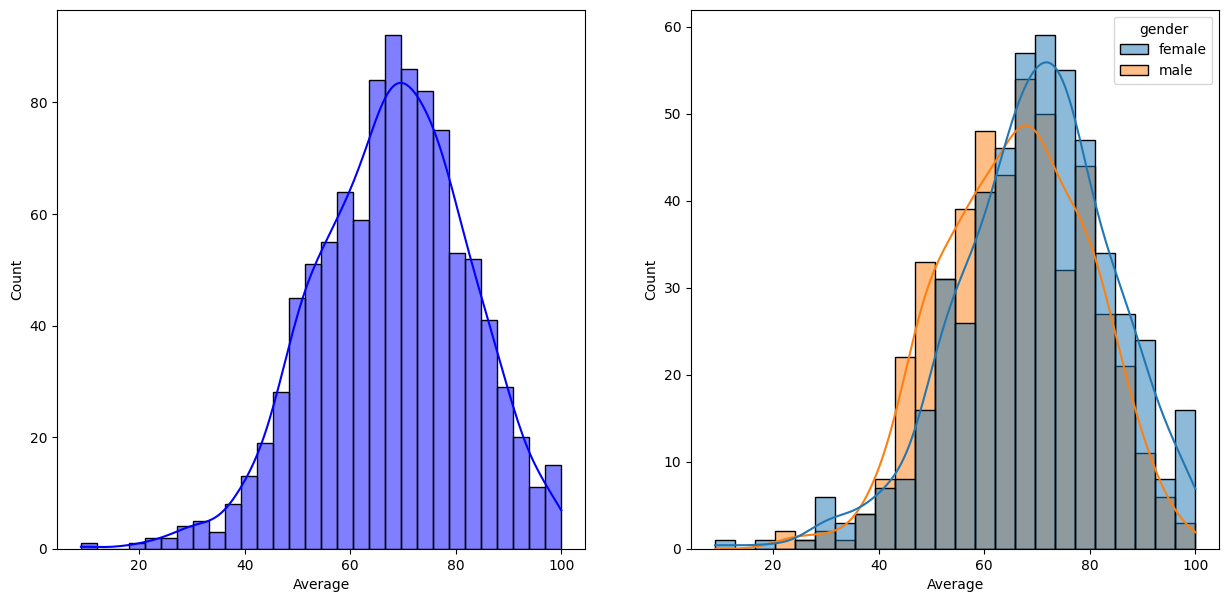

In [23]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde= True, hue='gender')
plt.show()

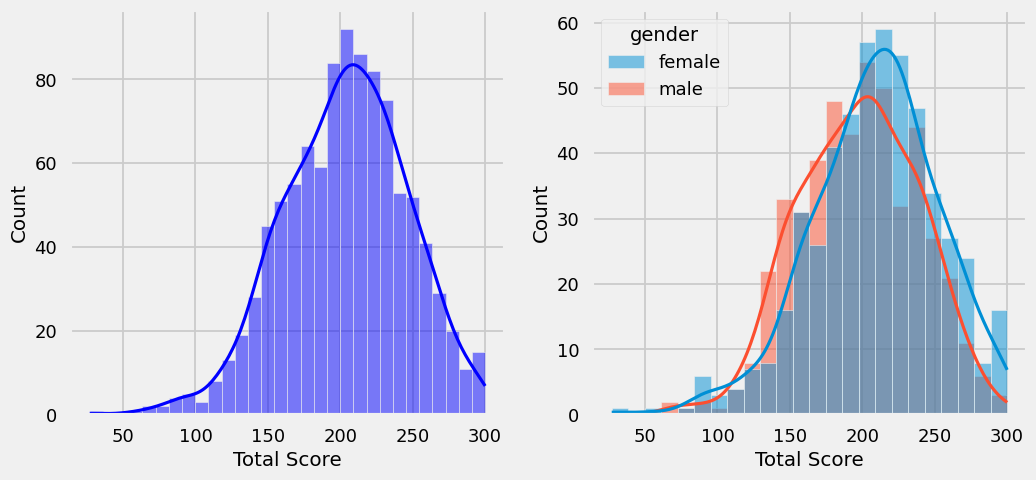

In [41]:
fig, axs = plt.subplots(1, 2, figsize = (11, 5))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='Total Score', kde= True, hue='gender')
plt.show()

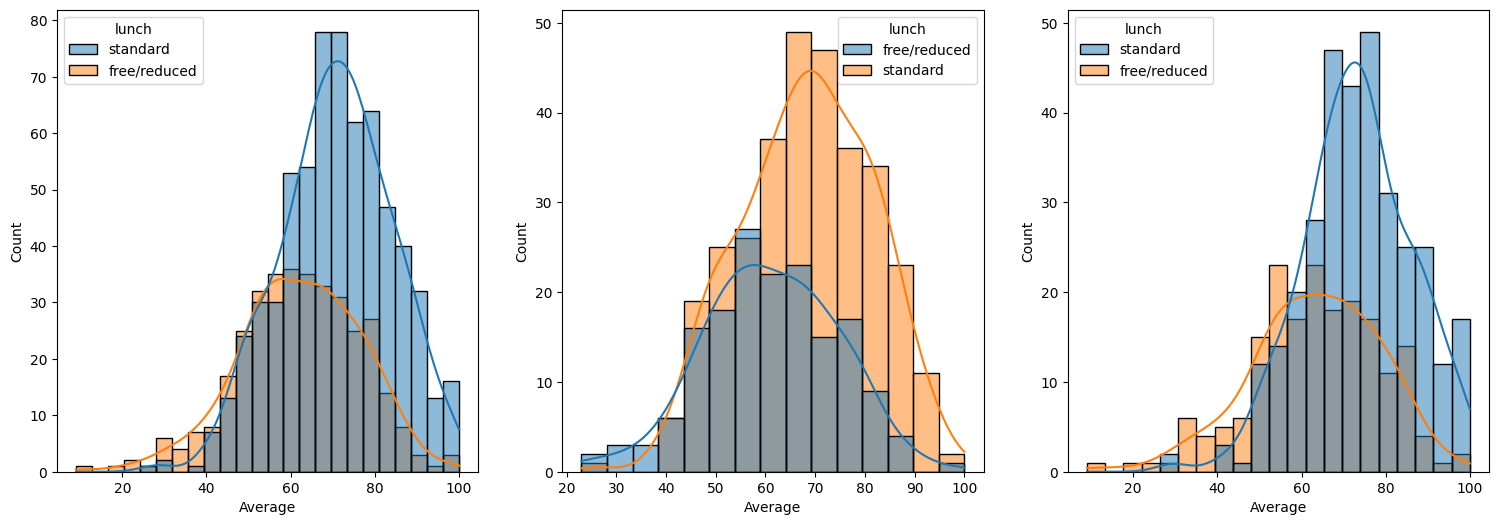

In [25]:
fig, axs = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='Average', kde= True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='Average', kde= True, hue='lunch')
plt.show()

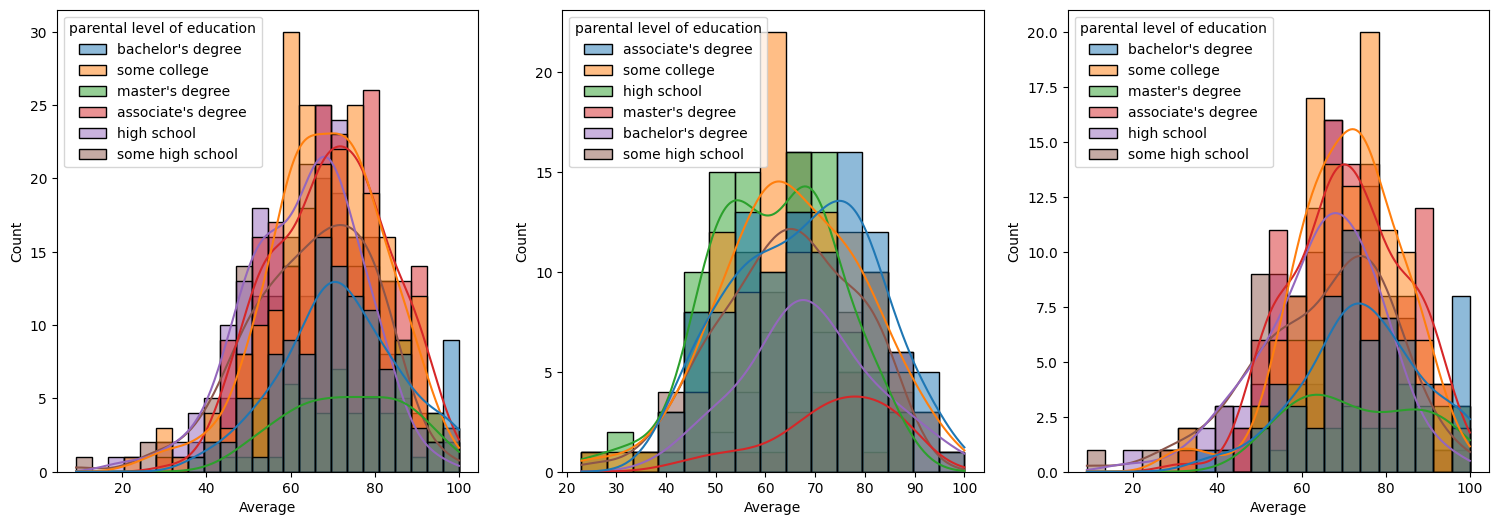

In [26]:
fig, axs = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='Average', kde= True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='Average', kde= True, hue='parental level of education')
plt.show()

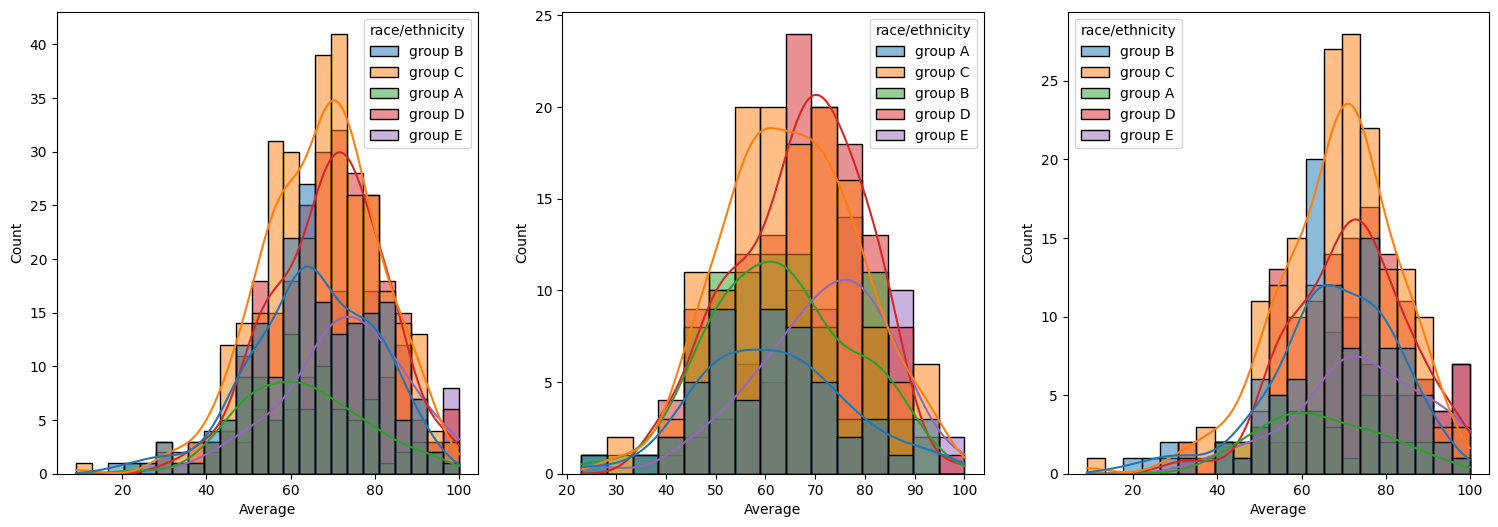

In [27]:
fig, axs = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='Average', kde= True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='Average', kde= True, hue='race/ethnicity')
plt.show()

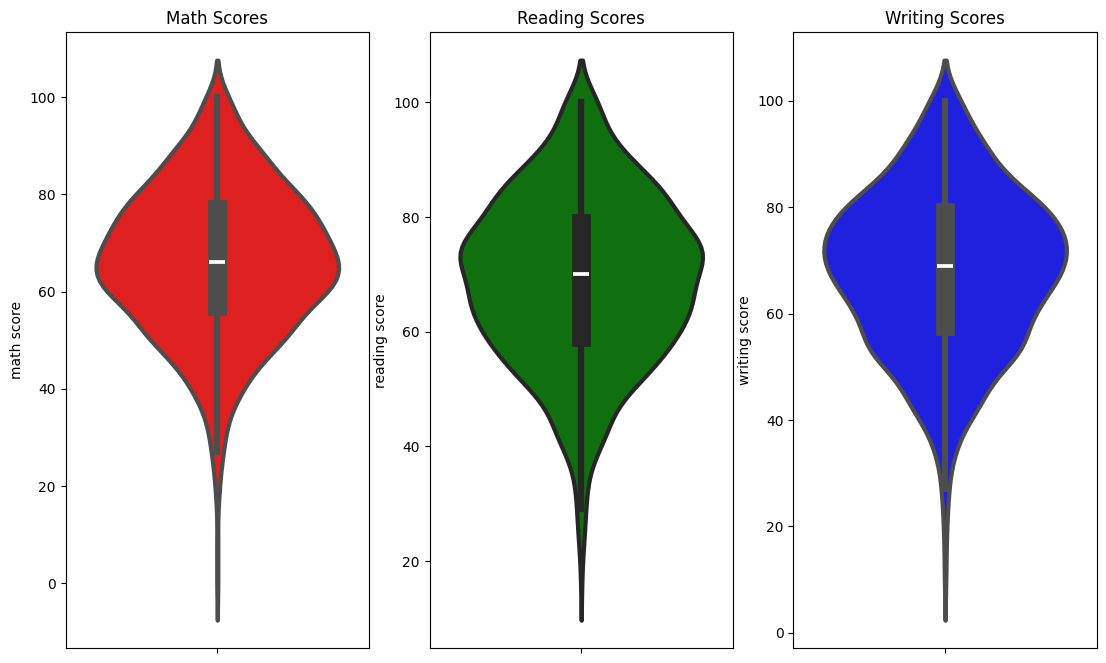

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

Multivariate Analysis using Pieplot

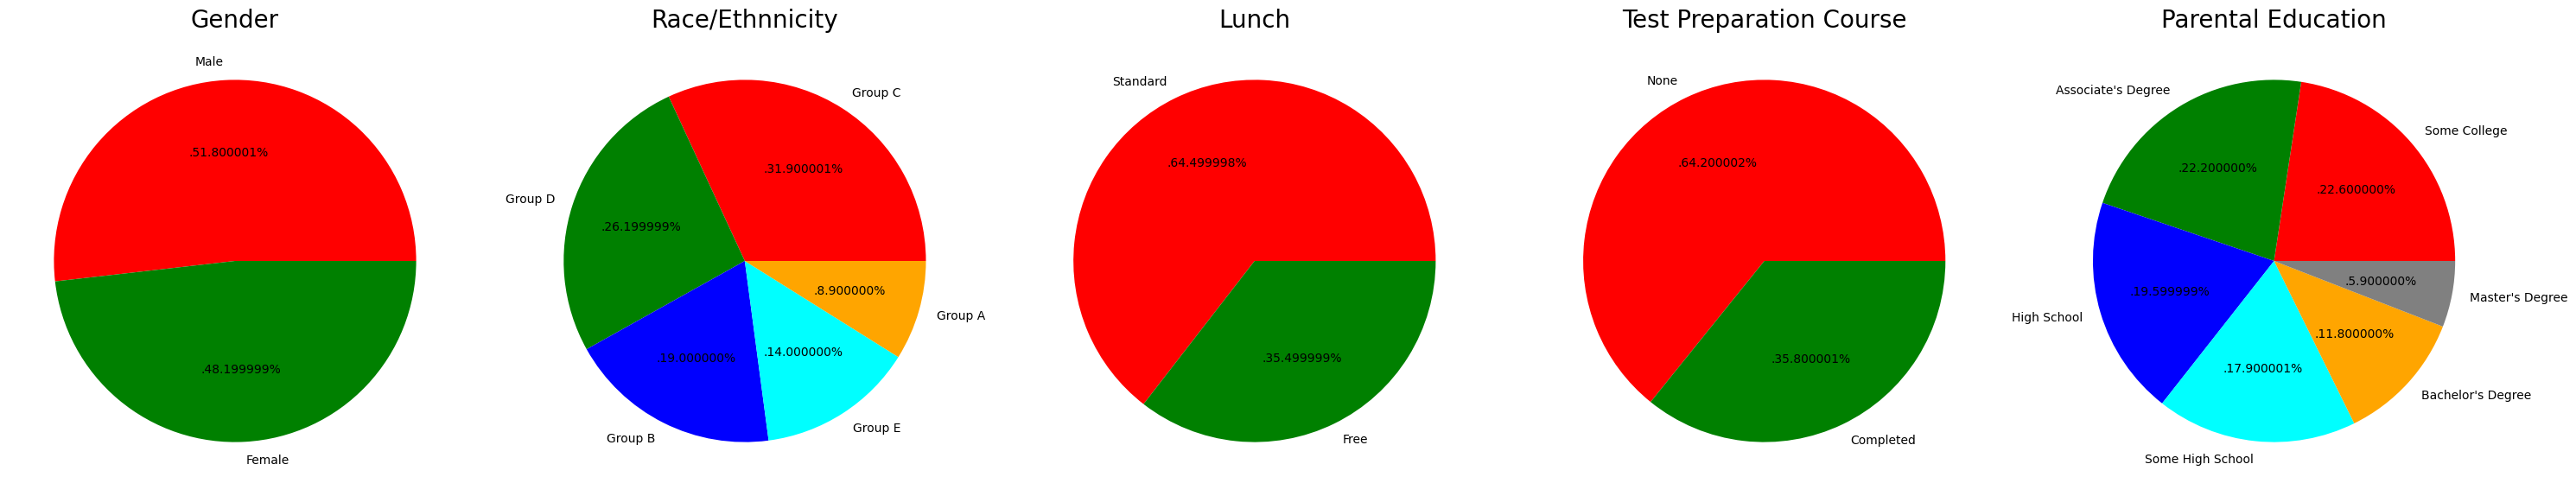

In [29]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels = 'Male','Female'
color = ['red','green']


plt.pie(size, colors = color, labels=labels, autopct = '.%2f%%')
plt.title('Gender', fontsize= 20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels = 'Group C','Group D', 'Group B', 'Group E', 'Group A'
color = ['red','green', 'blue', 'cyan', 'orange']


plt.pie(size, colors = color, labels=labels, autopct = '.%2f%%')
plt.title('Race/Ethnnicity', fontsize= 20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']


plt.pie(size, colors = color, labels=labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize= 20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels = 'None','Completed'
color = ['red','green']


plt.pie(size, colors = color, labels=labels, autopct = '.%2f%%')
plt.title('Test Preparation Course', fontsize= 20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green', 'blue', 'cyan', 'orange', 'grey']


plt.pie(size, colors = color, labels=labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize= 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Feature wise Visualization
1. Gender
  1. How is Gender Distributed
  2. Has Gender got any impact on a Student's performance ?

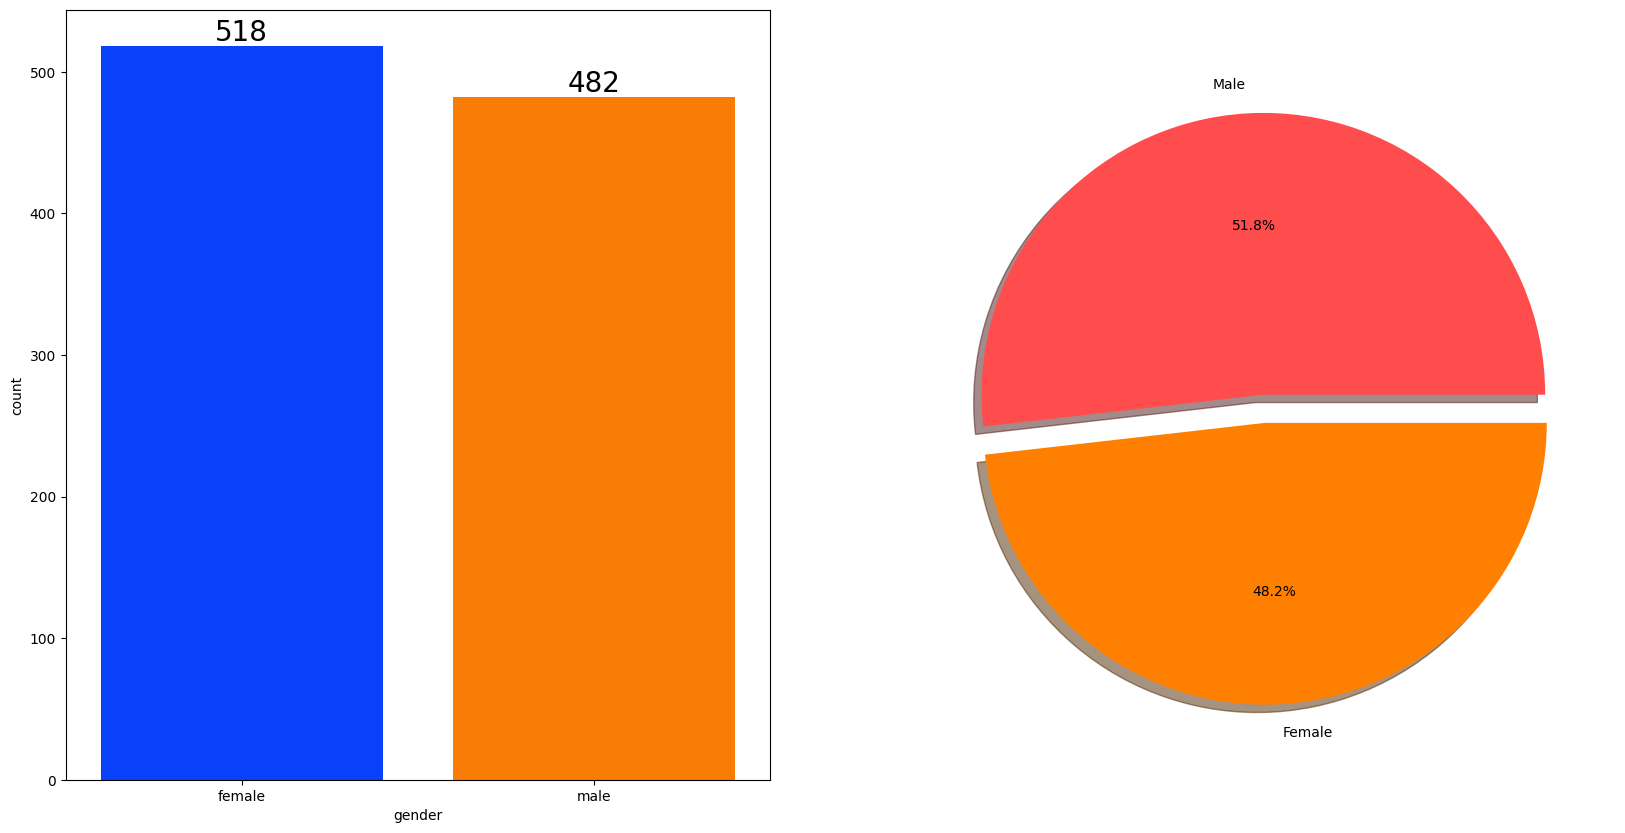

In [30]:
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette = 'bright', ax=ax[0], saturation=.95)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [31]:
gender_group = df.groupby('gender')
gender_group

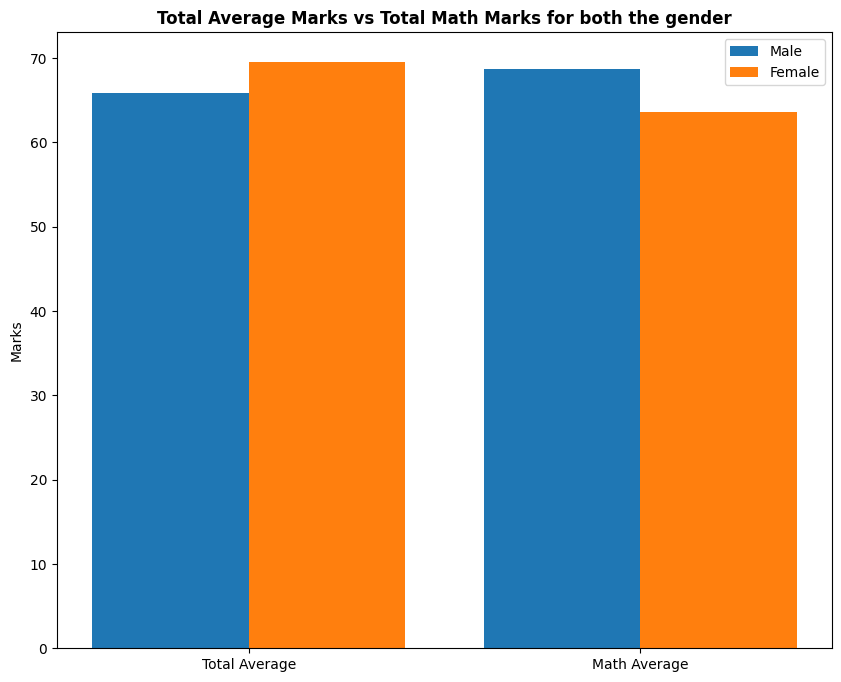

In [32]:
plt.figure(figsize=(10,8))
X= ['Total Average', 'Math Average']
female_scores = [gender_group['Average'].get_group('female').mean(),
                 gender_group['math score'].get_group('female').mean()]

# Calculate the average scores for males
male_scores = [gender_group['Average'].get_group('male').mean(),
                 gender_group['math score'].get_group('male').mean()]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average Marks vs Total Math Marks for both the gender", fontweight='bold')
plt.legend()
plt.show()


Race/Ethnicity Column


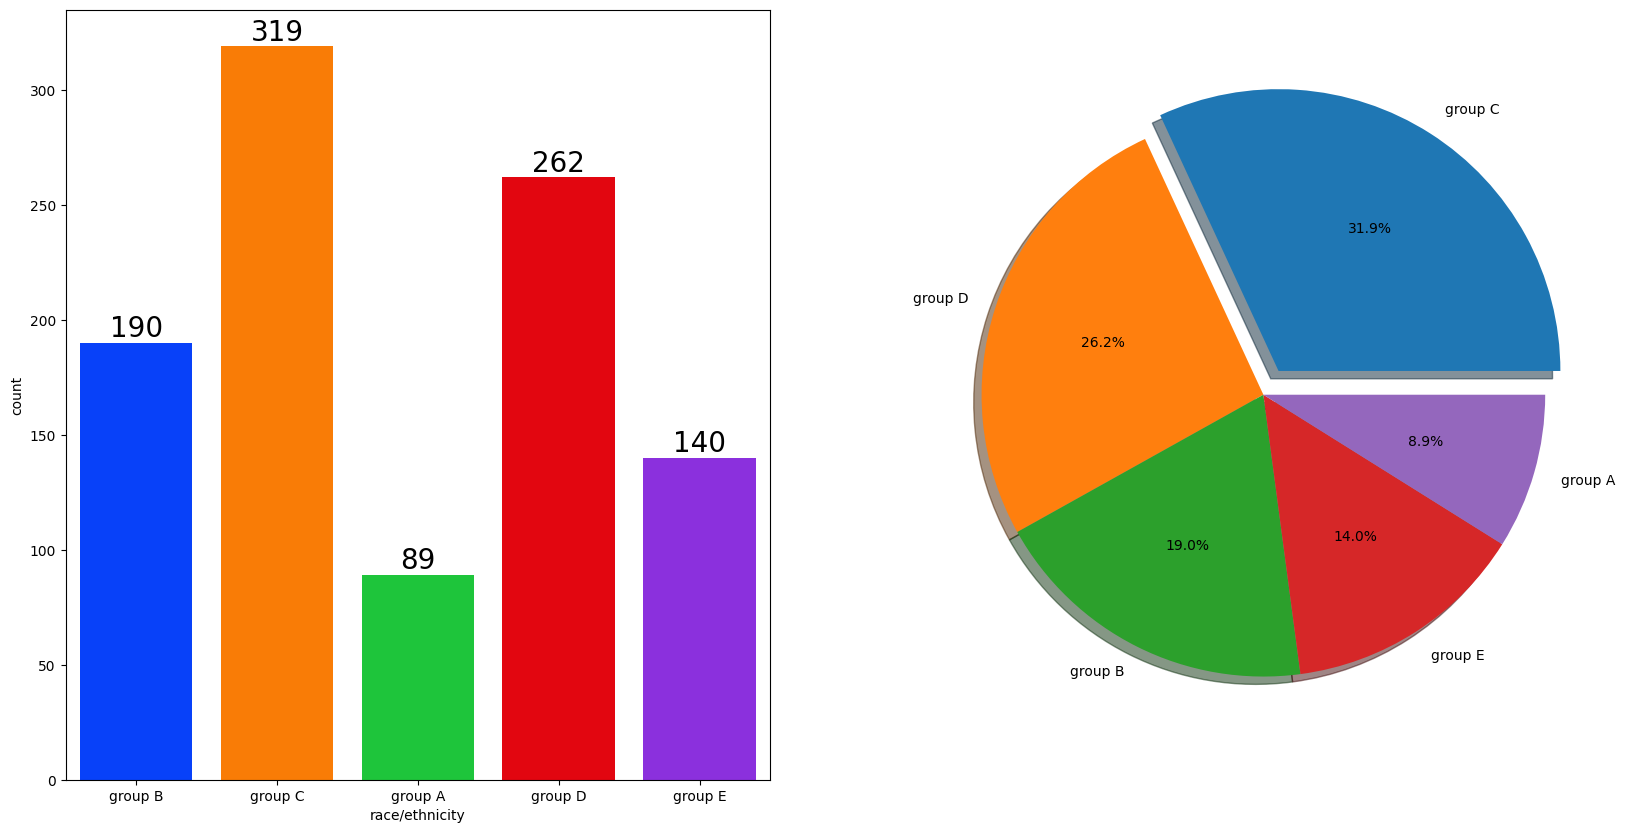

In [33]:
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'], data=df, palette = 'bright', ax=ax[0], saturation=.95)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

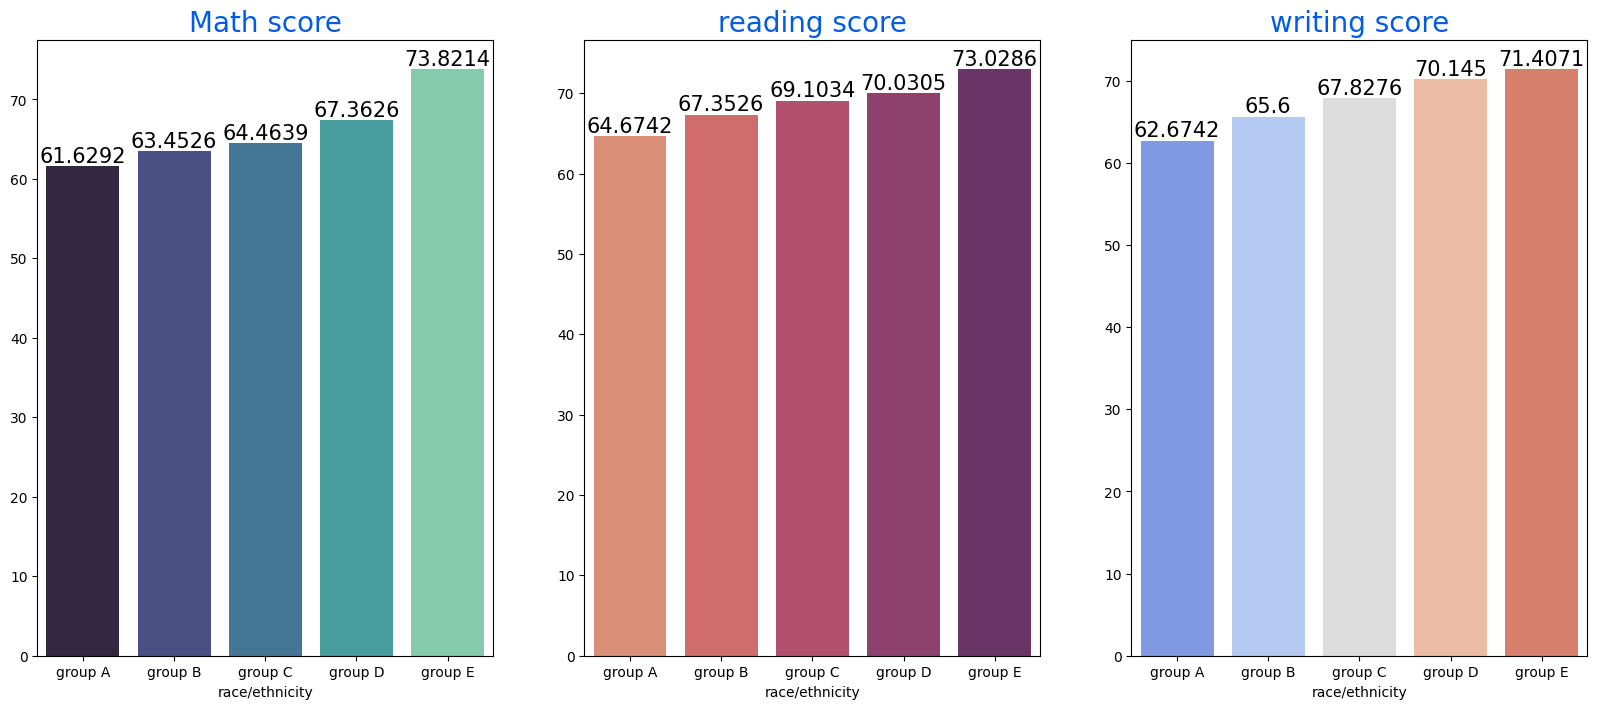

In [34]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=15)


sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('reading score',color='#005ce6',size=20)

for container in ax[1].containers:
  ax[1].bar_label(container,color='black',size=15)


sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('writing score',color='#005ce6',size=20)

for container in ax[2].containers:
  ax[2].bar_label(container,color='black',size=15)


<function matplotlib.pyplot.show(close=None, block=None)>

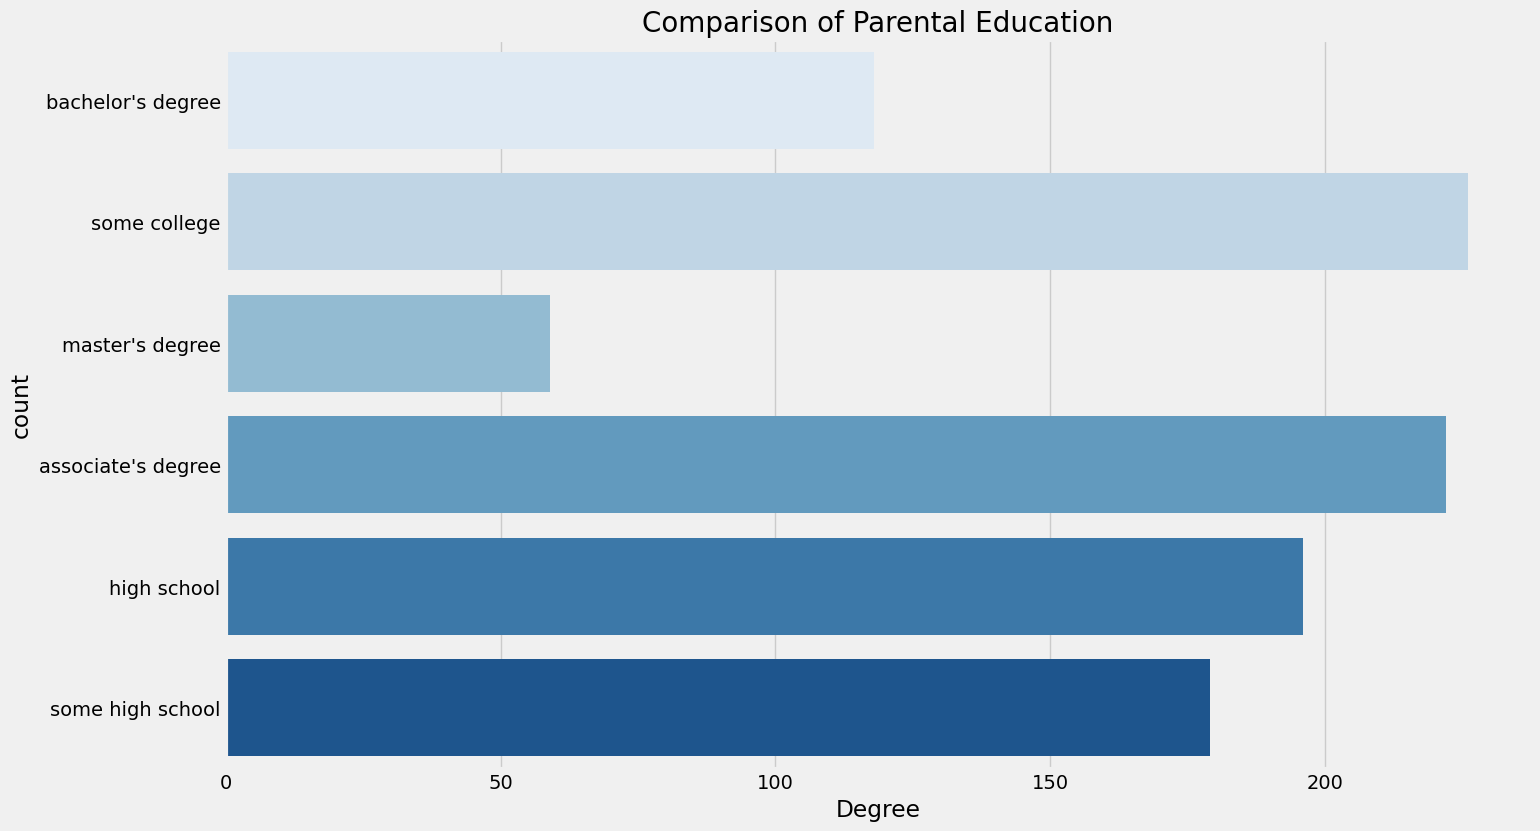

In [35]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontsize = 20, fontweight = 30)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show

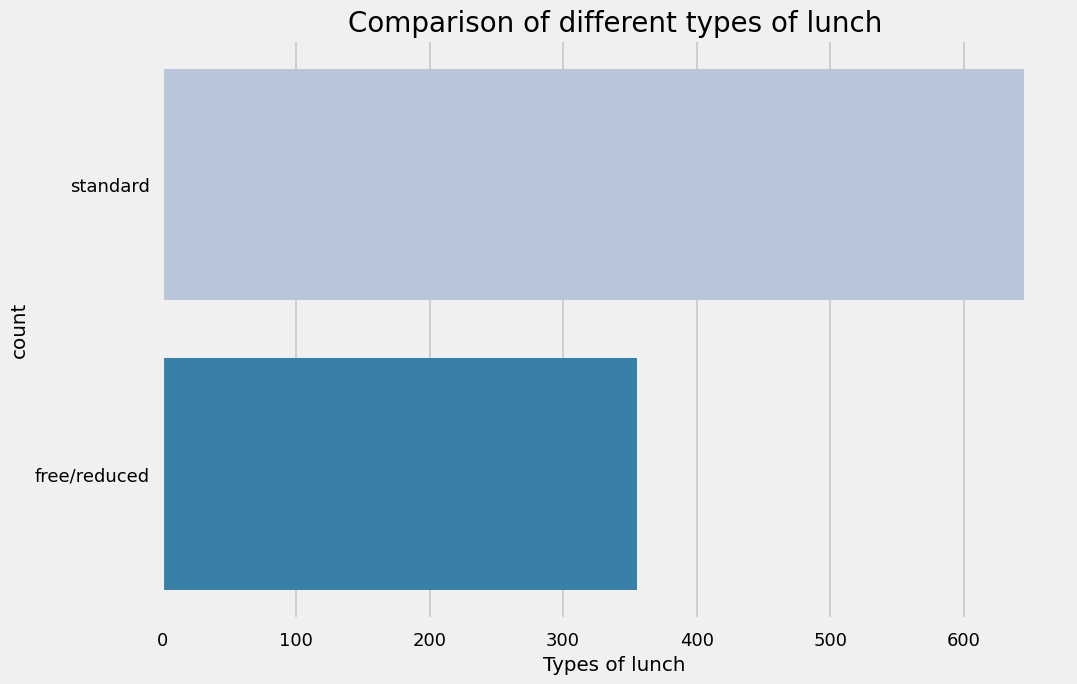

In [36]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('count')
plt.show()

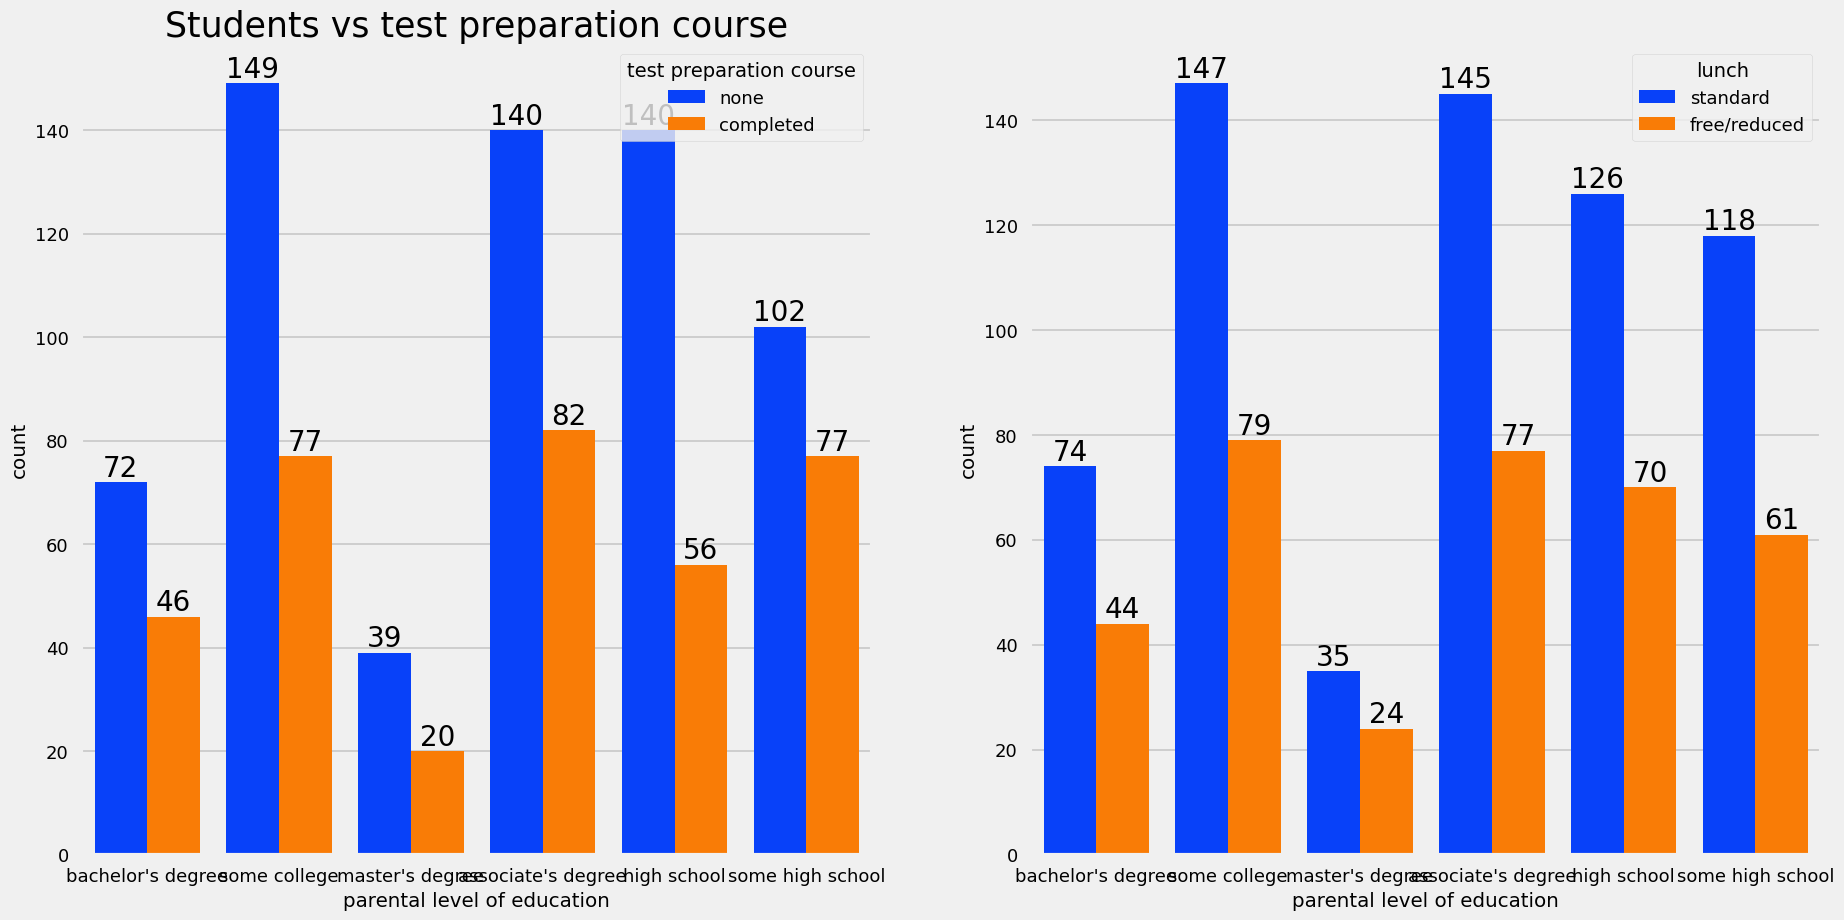

In [37]:
f, ax=plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course', color = 'black', size=25)
for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
  ax[1].bar_label(container, color='black', size=20)

<Axes: xlabel='lunch', ylabel='writing score'>

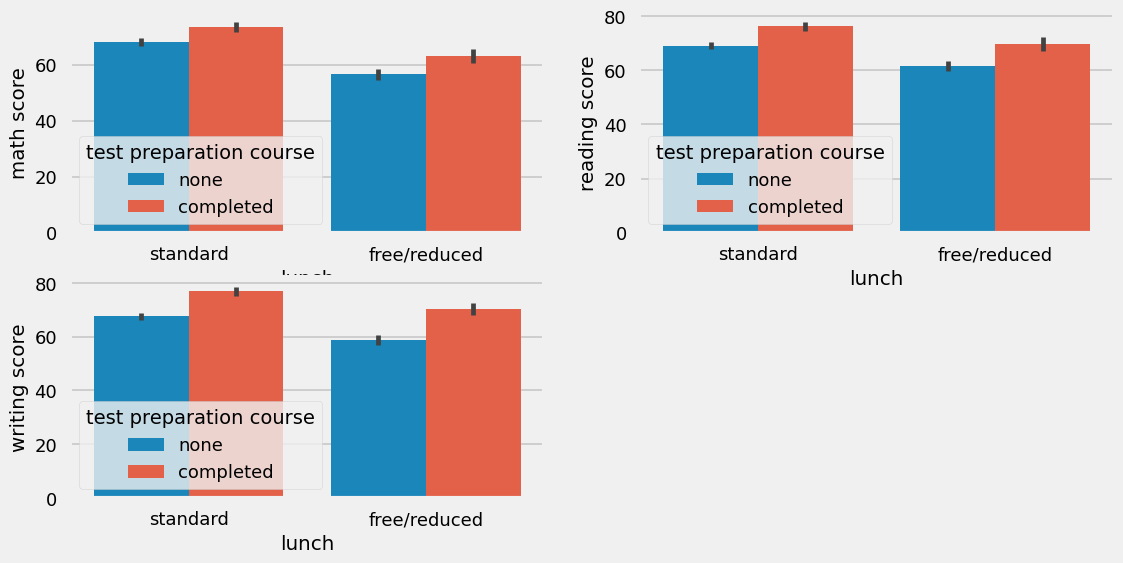

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue = df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue = df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue = df['test preparation course'])

Checking outliers

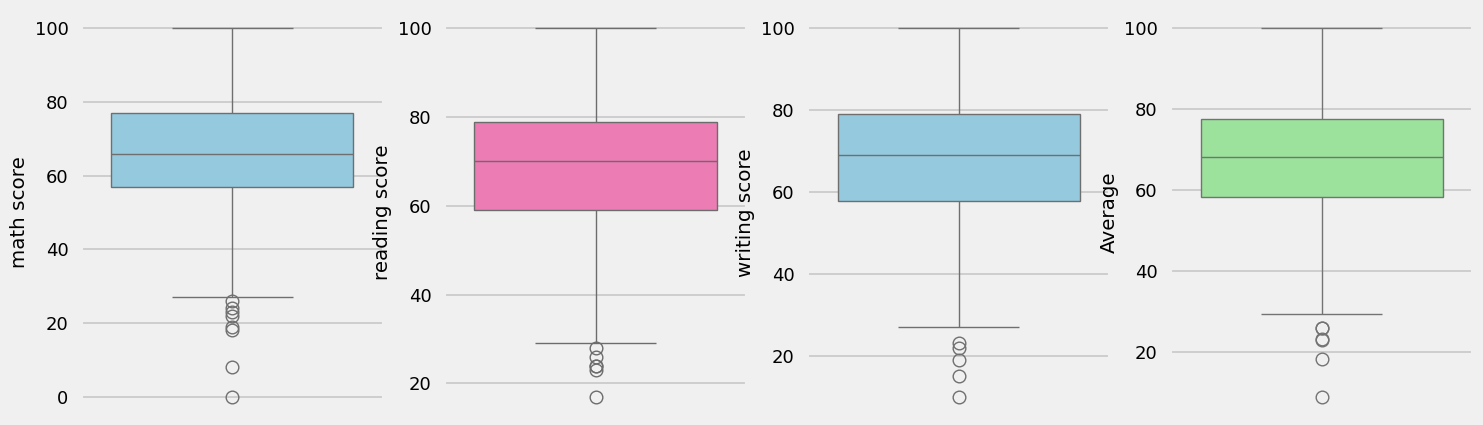

In [39]:
plt.subplots(1,4,figsize = (16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color = 'skyblue')
plt.subplot(144)
sns.boxplot(df['Average'], color = 'lightgreen')
plt.show()

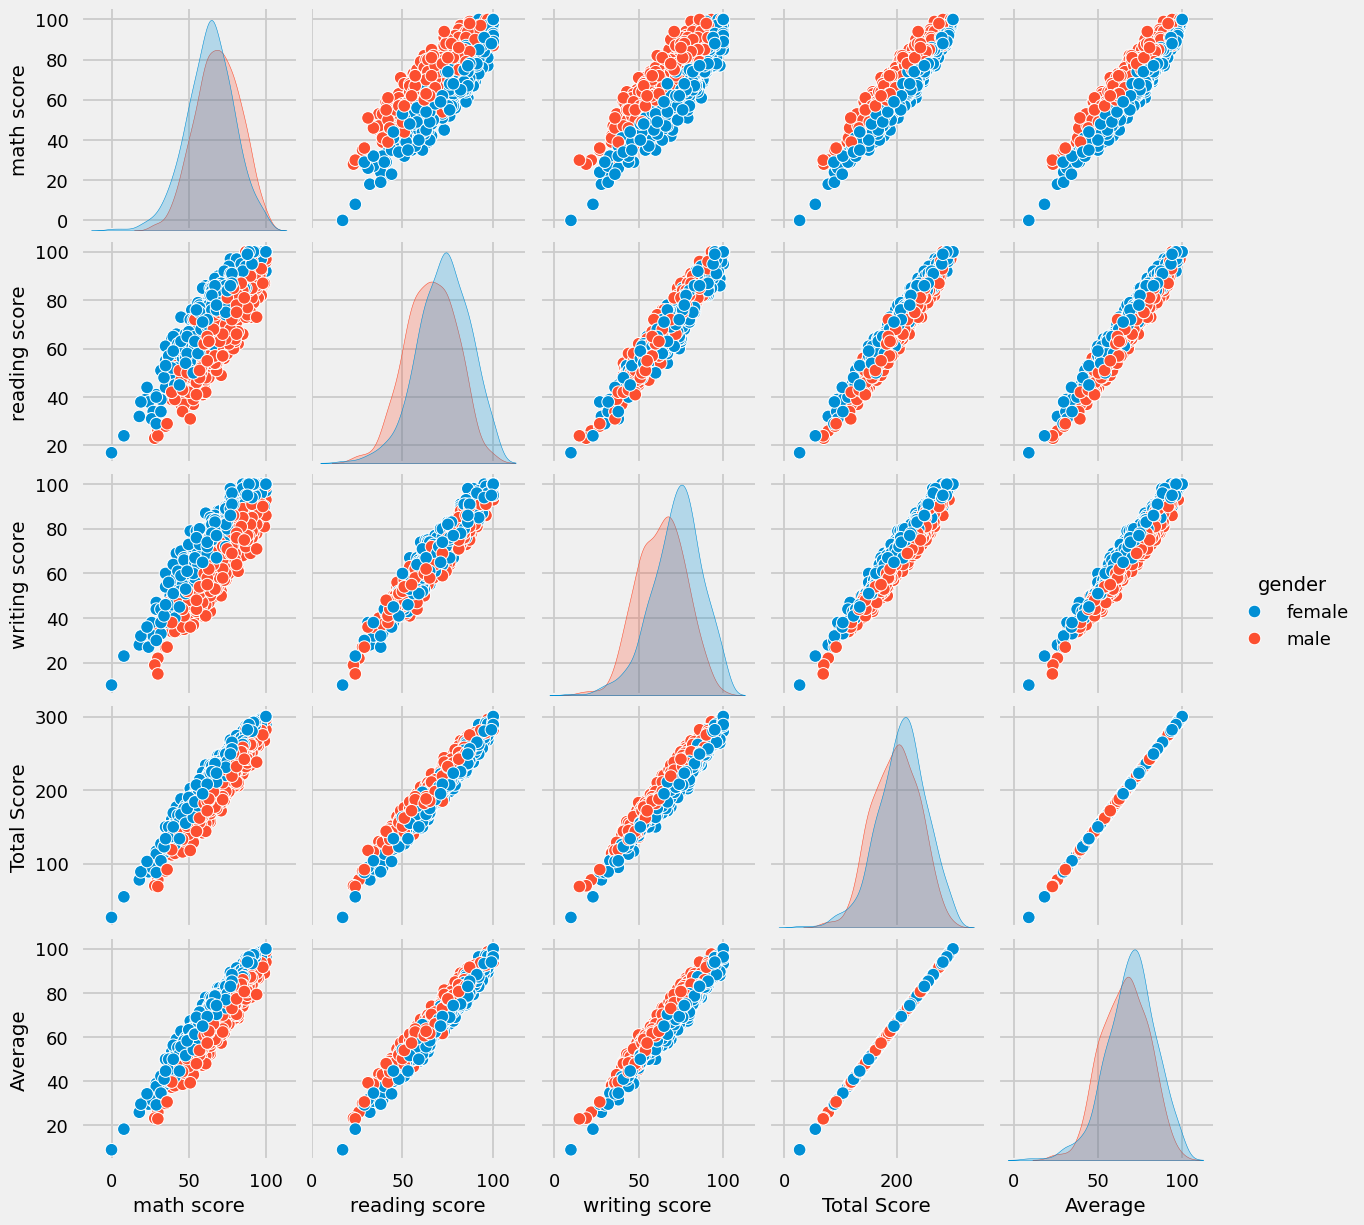

In [40]:
sns.pairplot(df,hue = 'gender')
plt.show()